# Hand-made deep learning neural network exercise

This is a short example of a hand-made deep learning neural network to predict an the presence of an object in an image, in this case the presence of 'cats' versus 'non-cats'.  This exercise is from the Coursera Neural Networks and Deep Learning course.  Optimization methods to improve gradient descent, like Adam or initialization of parameters are not used.  Just the basic structure of a neural network model are explored.  

The purpose of such an exercise is to have a working understanding of how the deep learning models are working on sklearn (from sklearn.neural_network import MLPClassifier), Keras, and Tensorflow.

<img src="cat.png" alt="Drawing" style="width: 200px;"/>

First load the needed libraries.

In [1]:
# nonoptimal_DL_basics_classicCatprediction0
# <script src="https://gist.github.com/j622amilah/4bdc8acc233e7b4cd6da422bbaf085ae.js"></script>
import math
import numpy as np      # linear algebra numpy library

import matplotlib.pyplot as plt     # for plotting
import h5py     # for reading/writing data from/to file

from PIL import Image  # Importing and resizing (Pillow) images

np.random.seed(1) # set a seed so that the results are consistent

Next, load 4 basic activation functions for solving forward and backward progagation.

In [2]:
# nonoptimal_DL_basics_classicCatprediction1
# <script src="https://gist.github.com/j622amilah/e2b2e77a0e8f862a5452dc93262b2f79.js"></script>
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size

    Return:
    A -- sigmoid(z)
    """
    A = 1/(1+np.exp(-z))
    
    assert(A.shape == z.shape)
    cache = z
    return A, cache

In [3]:
# nonoptimal_DL_basics_classicCatprediction2
# <script src="https://gist.github.com/j622amilah/fd58c4ef68a04c1460d1f6d68ed18d3f.js"></script>
def relu(z):
    """
    Compute the relu of z

    Arguments:
    z -- A scalar or numpy array of any size

    Return:
    A -- relu(z)
    """
    A = np.maximum(0,z)
    
    assert(A.shape == z.shape)
    cache = z
    return A, cache

In [4]:
# nonoptimal_DL_basics_classicCatprediction3
# <script src="https://gist.github.com/j622amilah/3f9d3751733a343592b98d23a4938cc8.js"></script>
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [5]:
# nonoptimal_DL_basics_classicCatprediction4
# <script src="https://gist.github.com/j622amilah/b1b6d8fa851b28b2dbf21e0e23986943.js"></script>
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

The last function to load is a prediction function, to avoid redundancy.

In [6]:
# nonoptimal_DL_basics_classicCatprediction5
# <script src="https://gist.github.com/j622amilah/ee9b4d71aacf47c8d51ebdb3fc708609.js"></script>
def predict_L_layer(X, y, parameters, m, L):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    p = np.zeros((1,m))
    
    # ---------------------------------------------------------
    # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID
    # ---------------------------------------------------------
    caches = []
    A = X
    
    # Implement [LINEAR -> RELU]*(L-1)
    for l in range(1, L):
        A_prev = A
        Z = (parameters['W' + str(l)]).dot(A_prev) + parameters['b' + str(l)]
        assert(Z.shape == (parameters['W' + str(l)].shape[0], A_prev.shape[1]))
        linear_cache = (A_prev, parameters['W' + str(l)], parameters['b' + str(l)])
        A, activation_cache = relu(Z)
        assert (A.shape == (parameters['W' + str(l)].shape[0], A_prev.shape[1]))
        cache = (linear_cache, activation_cache)
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID
    Z = (parameters['W' + str(L)]).dot(A) + parameters['b' + str(L)]
    assert(Z.shape == (parameters['W' + str(L)].shape[0], A.shape[1]))
    linear_cache = (A, parameters['W' + str(L)], parameters['b' + str(L)])
    probas, activation_cache = sigmoid(Z)
    assert (probas.shape == (parameters['W' + str(L)].shape[0], A.shape[1]))
    cache = (linear_cache, activation_cache)
    caches.append(cache)
    
    assert(probas.shape == (1, X.shape[1]))
    # ---------------------------------------------------------
    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

# Load the cat images

In [7]:
# nonoptimal_DL_basics_classicCatprediction6
# <script src="https://gist.github.com/j622amilah/1ed20fcdd546aafc5cb2028879dea878.js"></script>

# Loading the data (cat/non-cat)
file_loc = "C:\\Users\\jamilah\\Documents\\Sourceforge_analysis_PROJECTS\\Coursera_cat_DL_classification\\"
# file_loc = "C:\\Users\\...\\desired_folder\\"
file_to_open = file_loc + "train_catvnoncat.h5"

hf = h5py.File(file_to_open, 'r')
hf.keys()
# <KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

#n1 = hf.get('list_classes')
#n1
#classes = np.array(n1)  #array([b'non-cat', b'cat'], dtype='|S7')
classes = ["non-cat", "cat"]

n1 = hf.get('train_set_x')
train_x_orig =  np.array(n1)

#train_x_orig.shape  
#(209, 64, 64, 3)

n1 = hf.get('train_set_y')
train_set_y0 = np.array(n1)  # 0=non-cat, 1=cat

#train_y.shape  
#(209,)
train_y = train_set_y0*np.ones((1,209)) # to force it to be 1 by 209

hf.close()

# Load test data:
file_to_open = file_loc + "test_catvnoncat.h5"
hf = h5py.File(file_to_open, 'r')
hf.keys()
# <KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>

#n1 = hf.get('list_classes')
#n1
#<HDF5 dataset "list_classes": shape (2,), type "|S7">

n1 = hf.get('test_set_x')
test_x_orig =  np.array(n1)

#test_x_orig.shape  
#(50, 64, 64, 3)

n1 = hf.get('test_set_y')
test_set_y0 = np.array(n1)  # 0=non-cat, 1=cat

#test_y.shape   
#(50,)
test_y = test_set_y0*np.ones((1,50)) # to force it to be 1 by 50

hf.close()
# ----------------------------------------------

# Pre-process the images : reshape into X and y train and test sets

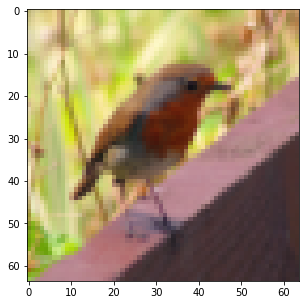

y = 0.0, it's a 'non-cat' picture.
Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)
train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [8]:
# nonoptimal_DL_basics_classicCatprediction7
# <script src="https://gist.github.com/j622amilah/820c136d44b56222509472aee6f16980.js"></script>


# ----------------------------------------------
# Example of a picture
index = 10
plt.rcParams["figure.figsize"] = (5,5)  # change figure size
plt.imshow(train_x_orig[index])
plt.show()

print ("y = " + str(train_y[0][index]) + ", it's a '" + classes[int(np.squeeze(train_y[0][index]))] +  "' picture.")
# ----------------------------------------------

# ----------------------------------------------
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))
# ----------------------------------------------


# ----------------------------------------------
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
# ----------------------------------------------

# Train the model

In [46]:
# nonoptimal_DL_basics_classicCatprediction8
# <script src="https://gist.github.com/j622amilah/4a695ea572ce465faf9860380cc57b20.js"></script>

# ---------------------------------------------------------
# Parameters initialization
# ---------------------------------------------------------
# Test out different neural network structures
layers_dims = [12288, 7, 1]  #  2-layer model : best performing model without optimization
# layers_dims = [12288, 7, 5, 1]  #  3-layer model
# layers_dims = [12288, 20, 7, 5, 1]  #  4-layer model
# layers_dims = [12288, 4, 3, 2, 1]  #  4-layer model

L = len(layers_dims) - 1             # number of layers in the network

# ---------------------------------------------------------

# Train the model
X = train_x
Y = train_y

m = Y.shape[1]  # equivalent to A_prev.shape[1]   number of examples/features

num_iterations = 2500
learning_rate = 0.0075
print_cost = True

np.random.seed(1)
costs = []                         # keep track of cost

# ---------------------------------------------------------

parameters = {}

for l in range(1, L+1):
    parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 0.01
    parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    
    assert(parameters['W' + str(l)].shape == (layers_dims[l], layers_dims[l-1]))
    assert(parameters['b' + str(l)].shape == (layers_dims[l], 1))

In [47]:
# nonoptimal_DL_basics_classicCatprediction9
# <script src="https://gist.github.com/j622amilah/d0014c5f354642b1bb7bc9f12ed3775a.js"></script>

# Loop (gradient descent)
for i in range(0, num_iterations):
    # ---------------------------------------------------------
    # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID
    # ---------------------------------------------------------
    caches = []
    A = X
    
    # Implement [LINEAR -> RELU]*(L-1)
    for l in range(1, L):
        A_prev = A
        Z = (parameters['W' + str(l)]).dot(A_prev) + parameters['b' + str(l)]
        assert(Z.shape == (parameters['W' + str(l)].shape[0], A_prev.shape[1]))
        linear_cache = (A_prev, parameters['W' + str(l)], parameters['b' + str(l)])
        A, activation_cache = relu(Z)
        assert (A.shape == (parameters['W' + str(l)].shape[0], A_prev.shape[1]))
        cache = (linear_cache, activation_cache)
        caches.append(cache)

    # Implement LINEAR -> SIGMOID
    Z = (parameters['W' + str(L)]).dot(A) + parameters['b' + str(L)]
    assert(Z.shape == (parameters['W' + str(L)].shape[0], A.shape[1]))
    linear_cache = (A, parameters['W' + str(L)], parameters['b' + str(L)])
    AL, activation_cache = sigmoid(Z)
    assert (AL.shape == (parameters['W' + str(L)].shape[0], A.shape[1]))
    cache = (linear_cache, activation_cache)
    caches.append(cache)
    
    assert(AL.shape == (1, X.shape[1]))
    # ---------------------------------------------------------
    
     # ---------------------------------------------------------
    # Compute cost
    # ---------------------------------------------------------
    cost = (-1/m)*np.sum(np.multiply(Y, np.log(AL)) + np.multiply((1-Y), np.log(1-AL)))
    assert(cost.shape == ())
    # ---------------------------------------------------------
    
    # ---------------------------------------------------------
    # Backward propagation
    # ---------------------------------------------------------
    grads = {}
    Y = Y.reshape(AL.shape) # stacks up Y to be the size of X_A
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
    
    # L-th layer (SIGMOID -> LINEAR) gradients
    linear_cache, activation_cache = caches[L-1]
    dZ = sigmoid_backward(dAL, activation_cache)
    A_prev, W_L, b_L = linear_cache  # A_prev is AL
    
    grads["dW" + str(L)] = (1/m)*np.dot(dZ, A_prev.T)             # matrix multiplication
    grads["db" + str(L)] = (1/m)*np.sum(dZ, axis=1, keepdims=True)
    grads["dA" + str(L-1)] = np.dot(W_L.T, dZ)
    
    assert (grads["dA" + str(L-1)].shape == A_prev.shape)
    assert (grads["dW" + str(L)].shape == W_L.shape)
    assert (grads["db" + str(L)].shape == b_L.shape)
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):  #range(L-2, 0, 1):  #range(start, stop, increment) -- range does not work
        # lth layer: (RELU -> LINEAR) gradients
        linear_cache, activation_cache = caches[l]
        dZ = relu_backward(grads["dA" + str(l+1)], activation_cache)
        A_prev, W, b = linear_cache
        
        dW_temp = (1/m)*np.dot(dZ, A_prev.T)             # matrix multiplication
        db_temp = (1/m)*np.sum(dZ, axis=1, keepdims=True)
        dA_prev_temp = np.dot(W.T, dZ)
        
        assert (dA_prev_temp.shape == A_prev.shape)
        assert (dW_temp.shape == W.shape)
        assert (db_temp.shape == b.shape)
        
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    # ---------------------------------------------------------
    
    # ---------------------------------------------------------
    # Update parameters
    # ---------------------------------------------------------
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]
    # ---------------------------------------------------------
    
    # Print the cost every 100 training example
    if print_cost and i % 100 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))
    if print_cost and i % 100 == 0:
        costs.append(cost)

Cost after iteration 0: 0.693050
Cost after iteration 100: 0.646432
Cost after iteration 200: 0.632514
Cost after iteration 300: 0.601502
Cost after iteration 400: 0.560197
Cost after iteration 500: 0.515830
Cost after iteration 600: 0.475490
Cost after iteration 700: 0.433916
Cost after iteration 800: 0.400798
Cost after iteration 900: 0.358071
Cost after iteration 1000: 0.339428
Cost after iteration 1100: 0.305275
Cost after iteration 1200: 0.274914
Cost after iteration 1300: 0.246818
Cost after iteration 1400: 0.198507
Cost after iteration 1500: 0.174483
Cost after iteration 1600: 0.170808
Cost after iteration 1700: 0.113065
Cost after iteration 1800: 0.096294
Cost after iteration 1900: 0.083426
Cost after iteration 2000: 0.074391
Cost after iteration 2100: 0.066307
Cost after iteration 2200: 0.059193
Cost after iteration 2300: 0.053361
Cost after iteration 2400: 0.048555


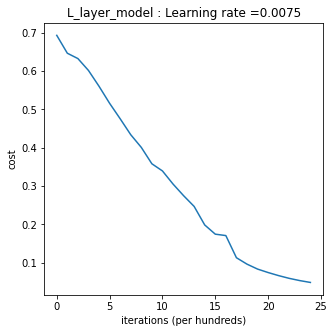

In [48]:
# plot the cost
plt.rcParams["figure.figsize"] = (5,5)  # change figure size
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("L_layer_model : Learning rate =" + str(learning_rate))
plt.show()

# Predict with the model using the test set

In [17]:
pred_train = predict_L_layer(train_x, train_y, parameters, m, L)

Accuracy: 0.9999999999999998


In [49]:
m = test_y.shape[1]  # equivalent to A_prev.shape[1]   number of examples/features
pred_test = predict_L_layer(test_x, test_y, parameters, m, L)

Accuracy: 0.72


# Investigating why the test prediction accuracy is so low

If the training accuracy is high (0.999) and the test accuracy is low (0.72) this means that the model is over fit to the training set.  The training set probably needs more diverse images of 'cats' or 'non-cats'.

From the class that I took, we learned that a good model needs to be trainned on a lot of unique image data.  For example, there should be many images of 'cats' and 'non-cats' from different camera angle, brightness, types of cats (color, species), scale of cat, background color, presence of cat's body. 

Below are images of 'cats' and 'non-cats' that were misclassified incorrectly, due to the lack of diversity of images in the training set.

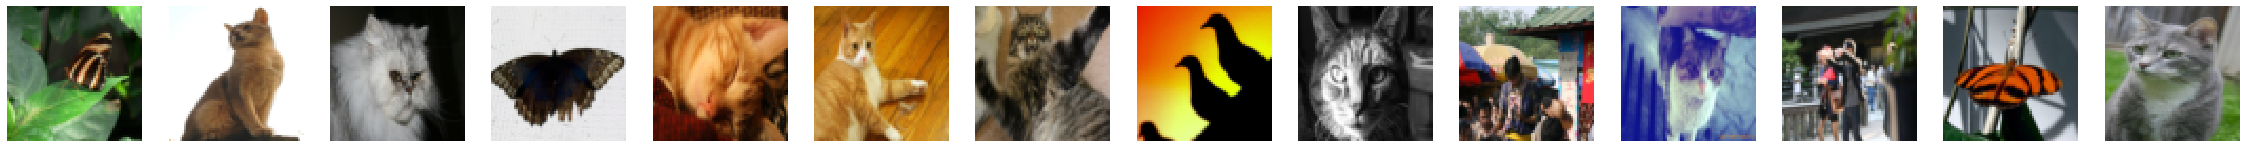

In [50]:
# Showing which images in the test set were mislabeled incorrectly
a = pred_test + test_y

# If an image was predicted correctly, a would either be 0 or 2.  
# Thus if a equals 1, it is predicted incorrectly.
mislabeled_indices = np.asarray(np.where(a == 1))

plt.rcParams['figure.figsize'] = (40.0, 40.0)
num_images = len(mislabeled_indices[0])

for i in range(num_images):
    index = mislabeled_indices[1][i]
    plt.subplot(2, num_images, i + 1)
    plt.imshow(test_x[:,index].reshape(64,64,3), interpolation='nearest')
    plt.axis('off')

# Investigating if the model can predict images from the Internet:

## Pre-process Internet image

In [53]:
# nonoptimal_DL_basics_classicCatprediction10
# <script src="https://gist.github.com/j622amilah/962dcab943acaf2e845ed0dde86ecb2a.js"></script>

# Test with your own image (optional/ungraded exercise)
whichimage = 1
if whichimage == 0:
    my_image = "cat.png"       # 1-layer=non-cat,   (NOT OK: cat upright)
elif whichimage == 1:
    my_image = "human_cat.png"     # cat  (OK: cat head/upperbody from left side)

Y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)

file_loc = "C:\\Users\\jamilah\\Documents\\Sourceforge_analysis_PROJECTS\\Coursera_cat_DL_classification\\"
# file_loc = "C:\\Users\\...\\desired_folder\\"  # for blog post
fname = file_loc + my_image

# Convert image to an array:
# Read image 
img = Image.open(fname)         # PIL: img is not in array form, it is a PIL.PngImagePlugin.PngImageFile 
rgb_image = img.convert('RGB')
# rgb_image.show()       # show image: shows from windows

# Resize image into a 64, 64, 3
num_px = 64
new_h, new_w = int(num_px), int(num_px)
img3 = rgb_image.resize((new_w, new_h), Image.ANTIALIAS)

w_resized, h_resized = img3.size[0], img3.size[1]

# Convert image to an array
image = np.array(img3)
image.shape

# Flatten image into a vector
myimage_flatten = np.reshape(np.ravel(image), (num_px*num_px*3, 1), order='F')

## Predict whether image is a cat or not

Accuracy: 1.0
y = 1.0, your algorithm predicts a "cat" picture.


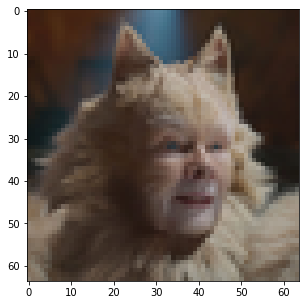

In [54]:
# nonoptimal_DL_basics_classicCatprediction11
# <script src="https://gist.github.com/j622amilah/3960839329680faaae0a5b686eab837c.js"></script>

import warnings
warnings.filterwarnings('ignore')

m = 1   #Y.shape[1]  # number of examples/features

my_predicted_image = predict_L_layer(myimage_flatten, Y, parameters, m, L)

# Normalize image
image = image/255.
plt.rcParams["figure.figsize"] = (5,5)  # change figure size
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image))] +  "\" picture.")

Again we can see that this model is over-fitted to the training data, because the two Internet picture of a cat could not be classified correctly.

We can see that the cat Internet image was mislabeled as a 'non-cat', most likely due to the scale.  And, the human dressed up at a cat is sometimes classified as a cat and sometimes it is not classified as a cat.

The human cat image is probably more similar to the training 'cat' images, in terms of scale, form outline, and contrast of the fur with respect to the background color.  For this reason it is sometimes classified as one or the other, depending on the gradient descent minimum. 

In a next post, I will practice saliency maps to identify what features in the image cause them to be mislabeled and thus help us to identify how to make the dataset more robust at identifying a desired object.  